In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
houseDF = pd.read_csv('American_Housing_Data_.csv')

In [3]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [4]:
houseDF.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [5]:
houseDF.max()

Zip Code                                             98199
Price                                           38000000.0
Beds                                                    54
Baths                                                   66
Living Space                                         74340
Address                    MM ROSELEIGH IL (ASHVILLE PARK)
City                                                 Yukon
State                                            Wisconsin
Zip Code Population                                 116469
Zip Code Density                                   58289.6
County                                           Wyandotte
Median Household Income                           900203.0
Latitude                                          47.74237
Longitude                                        -73.70451
dtype: object

In [6]:
houseDF.min()

Zip Code                              10013
Price                                1800.0
Beds                                      1
Baths                                     1
Living Space                              2
Address                    0 CREEK BEND WAY
City                            Albuquerque
State                               Arizona
Zip Code Population                       0
Zip Code Density                        0.0
County                                Adams
Median Household Income             27475.0
Latitude                           25.72983
Longitude                        -122.82687
dtype: object

In [7]:
houseDF

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [8]:
houseDF.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


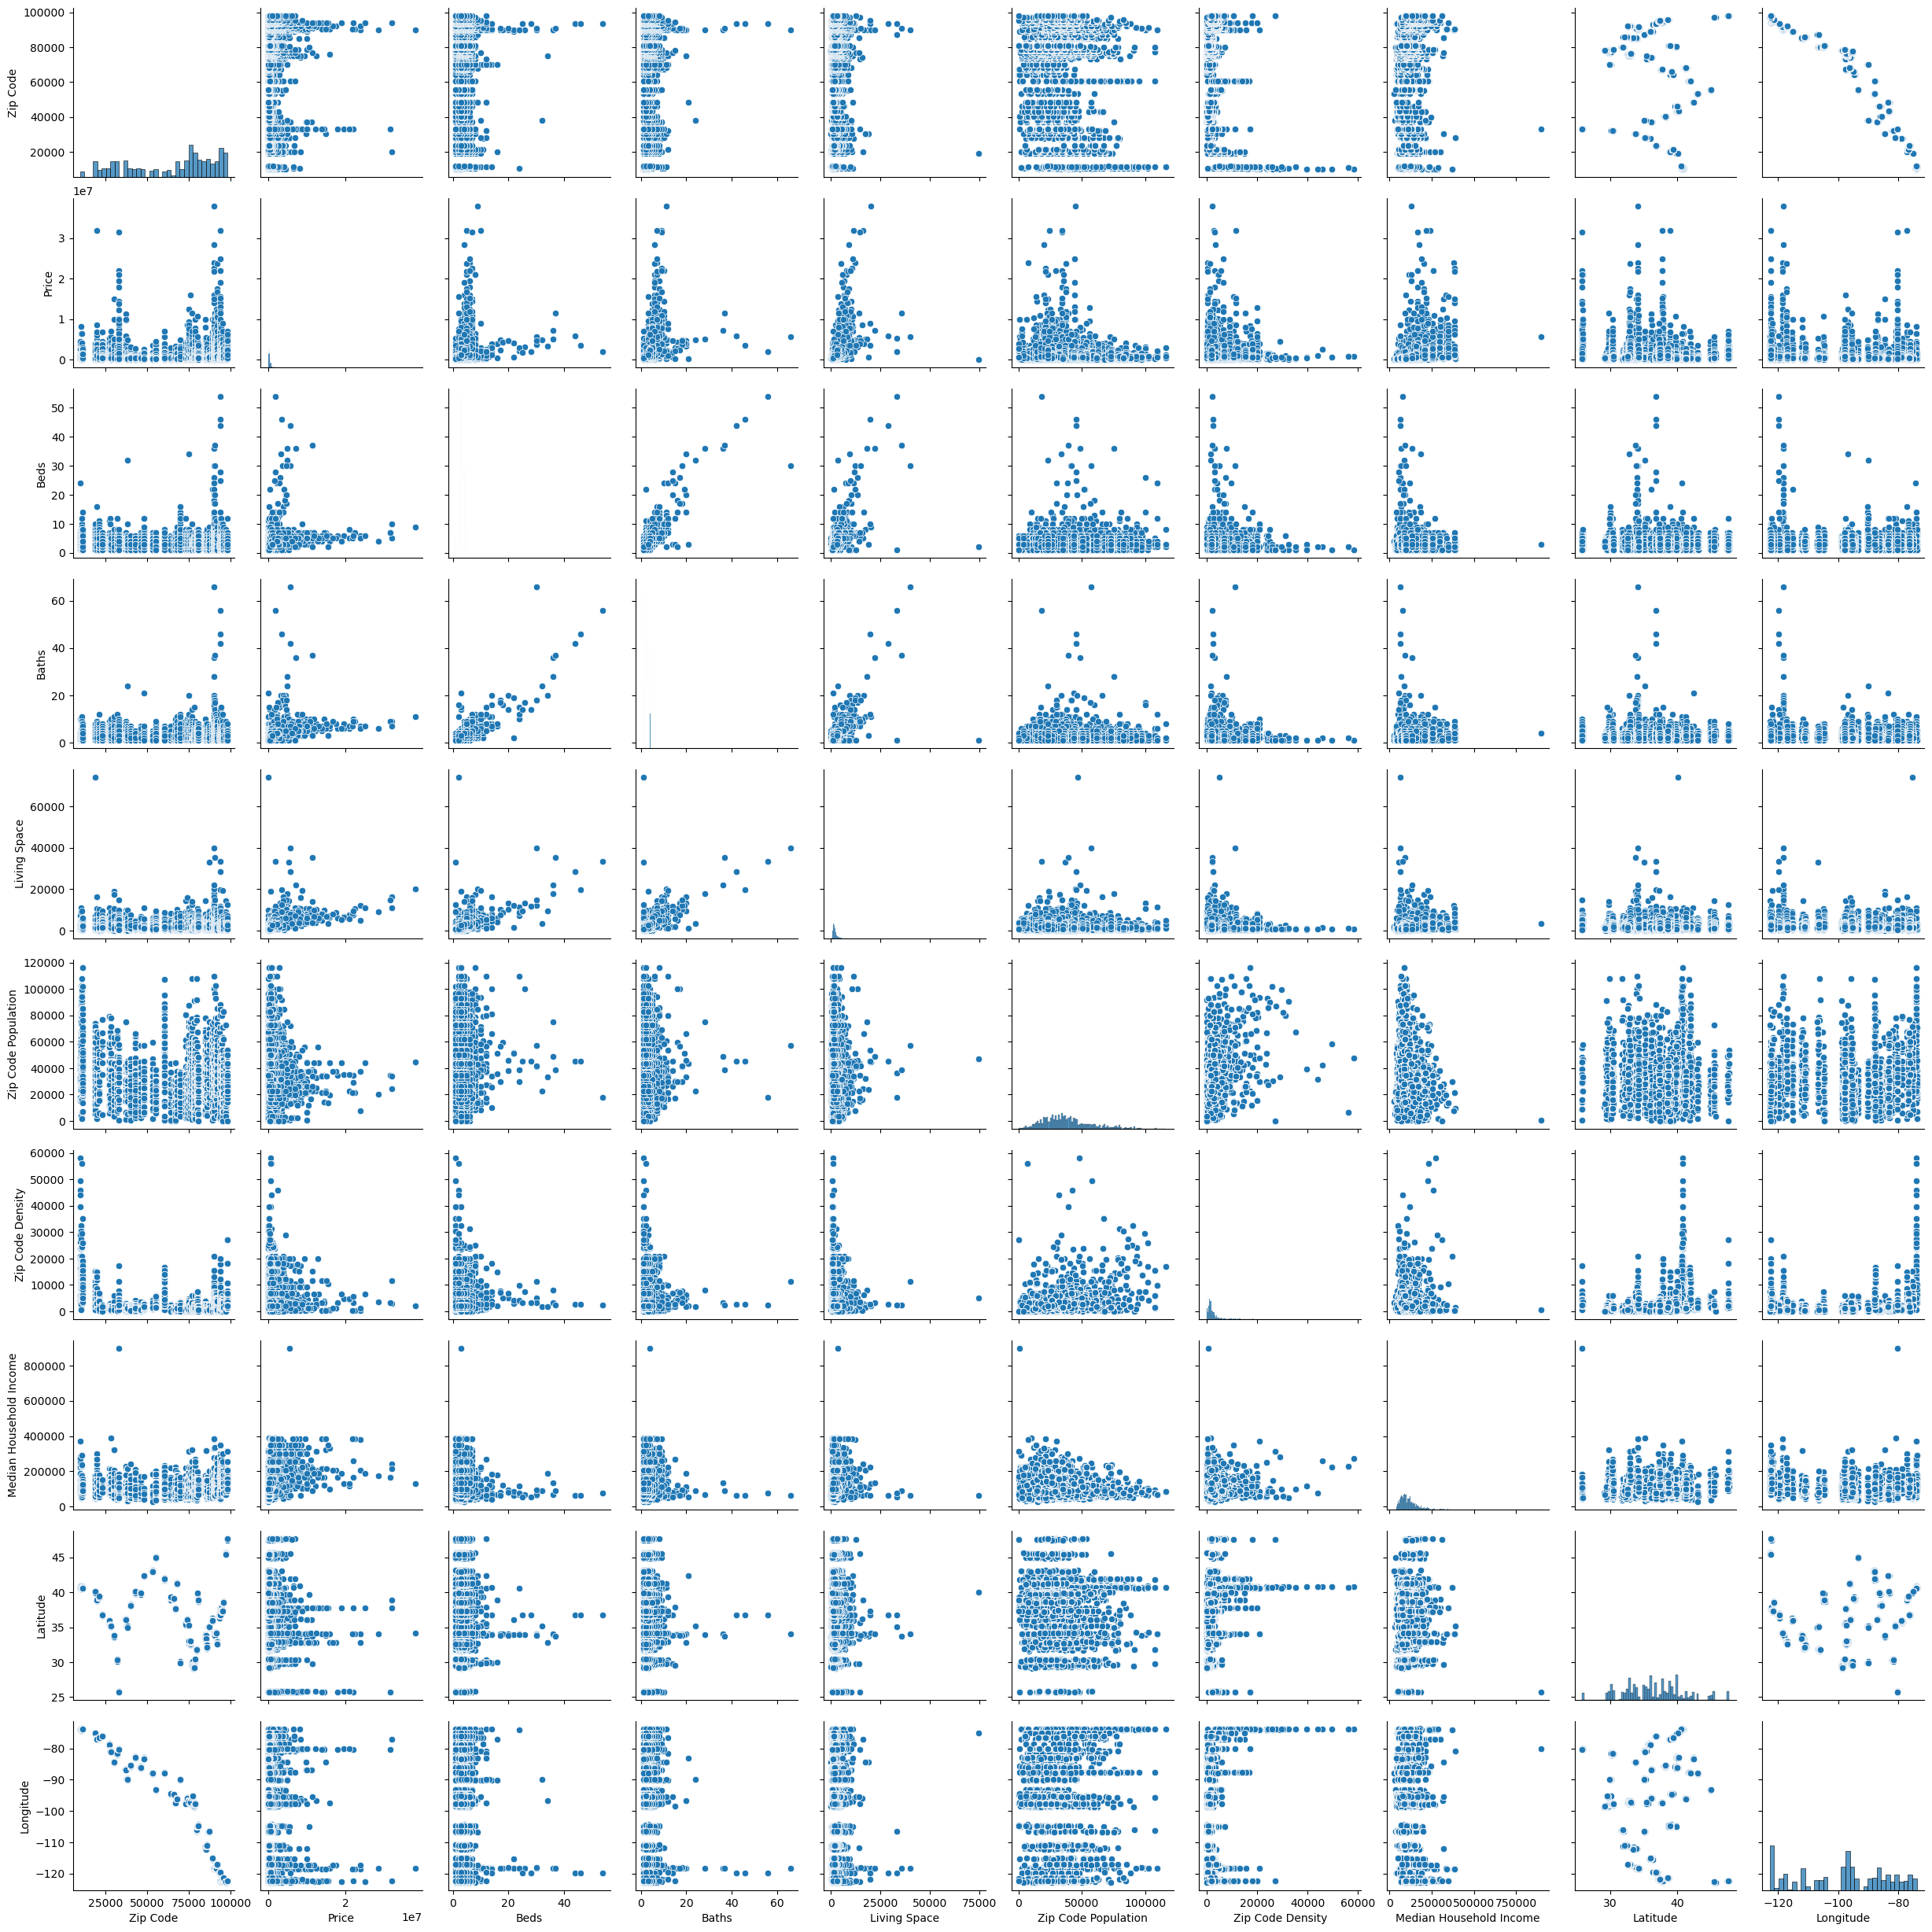

In [9]:
sns.pairplot(houseDF)

array([[<Axes: title={'center': 'Zip Code'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Beds'}>],
       [<Axes: title={'center': 'Baths'}>,
        <Axes: title={'center': 'Living Space'}>,
        <Axes: title={'center': 'Zip Code Population'}>],
       [<Axes: title={'center': 'Zip Code Density'}>,
        <Axes: title={'center': 'Median Household Income'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >]],
      dtype=object)

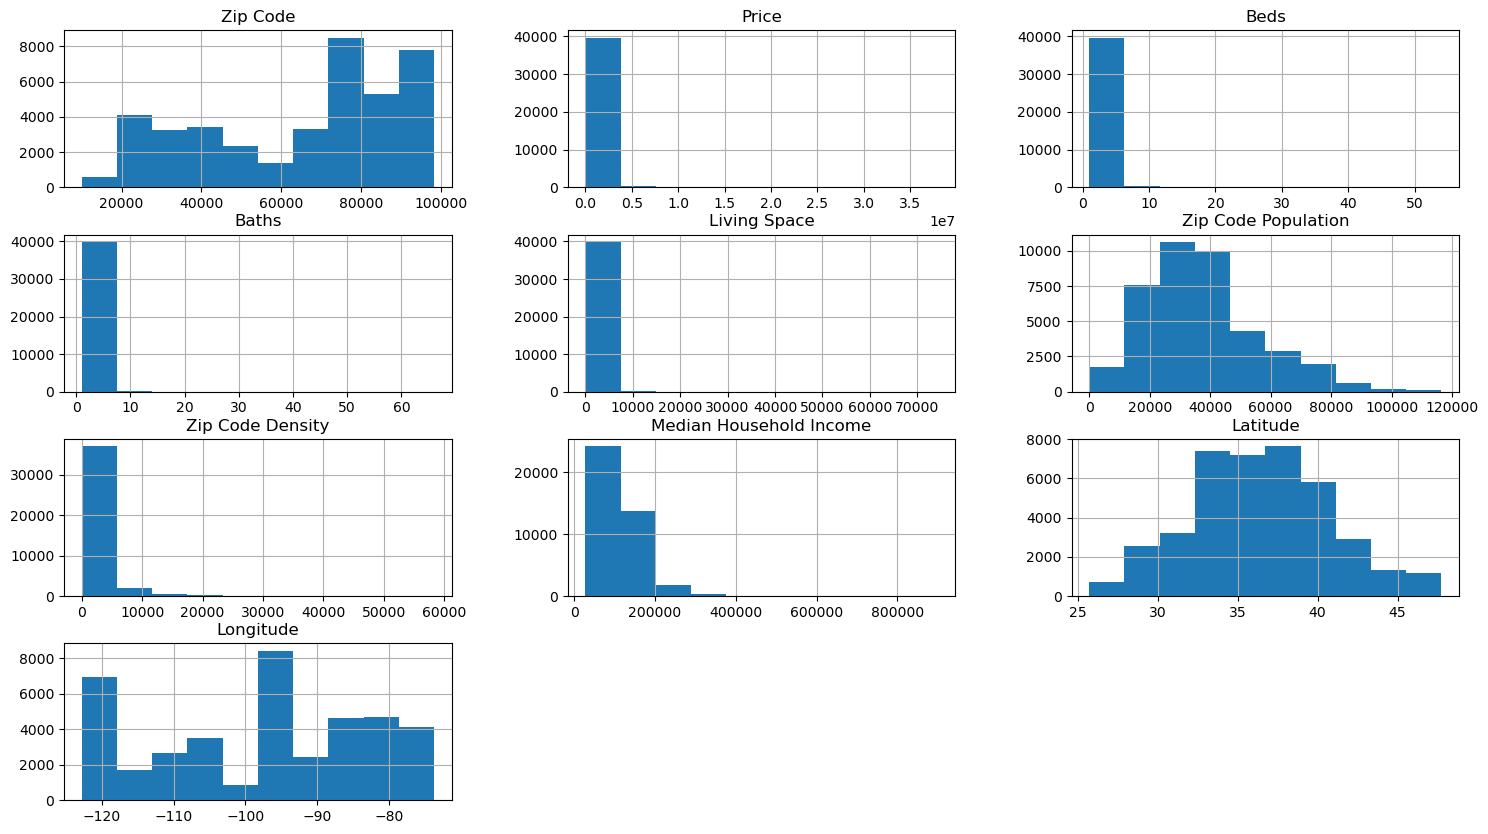

In [10]:
houseDF.hist(figsize = (18, 10))

In [11]:
houseDF.dropna(inplace=True)

In [12]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39979 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39979 non-null  int64  
 1   Price                    39979 non-null  float64
 2   Beds                     39979 non-null  int64  
 3   Baths                    39979 non-null  int64  
 4   Living Space             39979 non-null  int64  
 5   Address                  39979 non-null  object 
 6   City                     39979 non-null  object 
 7   State                    39979 non-null  object 
 8   Zip Code Population      39979 non-null  int64  
 9   Zip Code Density         39979 non-null  float64
 10  County                   39979 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39979 non-null  float64
 13  Longitude                39979 non-null  float64
dtypes: float64(5), int64(5), ob

In [13]:
houseDF

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [14]:
X = houseDF.drop(['Price'], axis=1)
y = houseDF['Price']

In [15]:
X

,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [16]:
y

0        3999000.0
1        3999000.0
2        1650000.0
3         760000.0
4        1100000.0
           ...    
39976    2495000.0
39977    2295000.0
39978     950000.0
39979     425000.0
39980    1150000.0
Name: Price, Length: 39979, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
train_data = X_train.join(y_train)

In [19]:
train_data

,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,Price
9678,40203,3,2,1260,520 S 20TH ST,Louisville,Kentucky,17263,2302.1,Jefferson,48118.0,38.24722,-85.76500,140000.0
278,11203,5,3,1920,5910 SNYDER AVE,Brooklyn,New York,79499,14350.1,Kings,89068.0,40.64958,-73.93431,849000.0
6079,30318,5,5,3294,1231 HOLLY ST NW UNIT B,Atlanta,Georgia,58839,1118.6,Fulton,112621.0,33.79235,-84.44831,1225000.0
4792,28205,2,1,933,5039 ERICKSON RD,Charlotte,North Carolina,51418,1678.5,Mecklenburg,99270.0,35.22019,-80.78737,299000.0
1817,20010,3,3,2325,3610 PARK PL NW # 2,Washington,District of Columbia,33656,13060.3,District of Columbia,150699.0,38.93255,-77.03128,930000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11282,43230,3,3,2188,371 EMORY ST,Columbus,Ohio,58956,1115.6,Franklin,107912.0,40.03648,-82.87057,424900.0
31024,87120,3,2,1658,4217 HILLSPIRE AVE NW,Albuquerque,New Mexico,66118,442.9,Bernalillo,98519.0,35.14097,-106.76522,300000.0
39111,97266,3,2,1116,8809 SE REEDWAY ST,Portland,Oregon,35371,2254.4,Multnomah,87438.0,45.48268,-122.55838,389000.0
20955,75252,4,3,3158,17855 BENCHMARK DR,Dallas,Texas,27310,2054.9,Collin,125791.0,32.99696,-96.78983,675000.0


array([[<Axes: title={'center': 'Zip Code'}>,
        <Axes: title={'center': 'Beds'}>,
        <Axes: title={'center': 'Baths'}>],
       [<Axes: title={'center': 'Living Space'}>,
        <Axes: title={'center': 'Zip Code Population'}>,
        <Axes: title={'center': 'Zip Code Density'}>],
       [<Axes: title={'center': 'Median Household Income'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

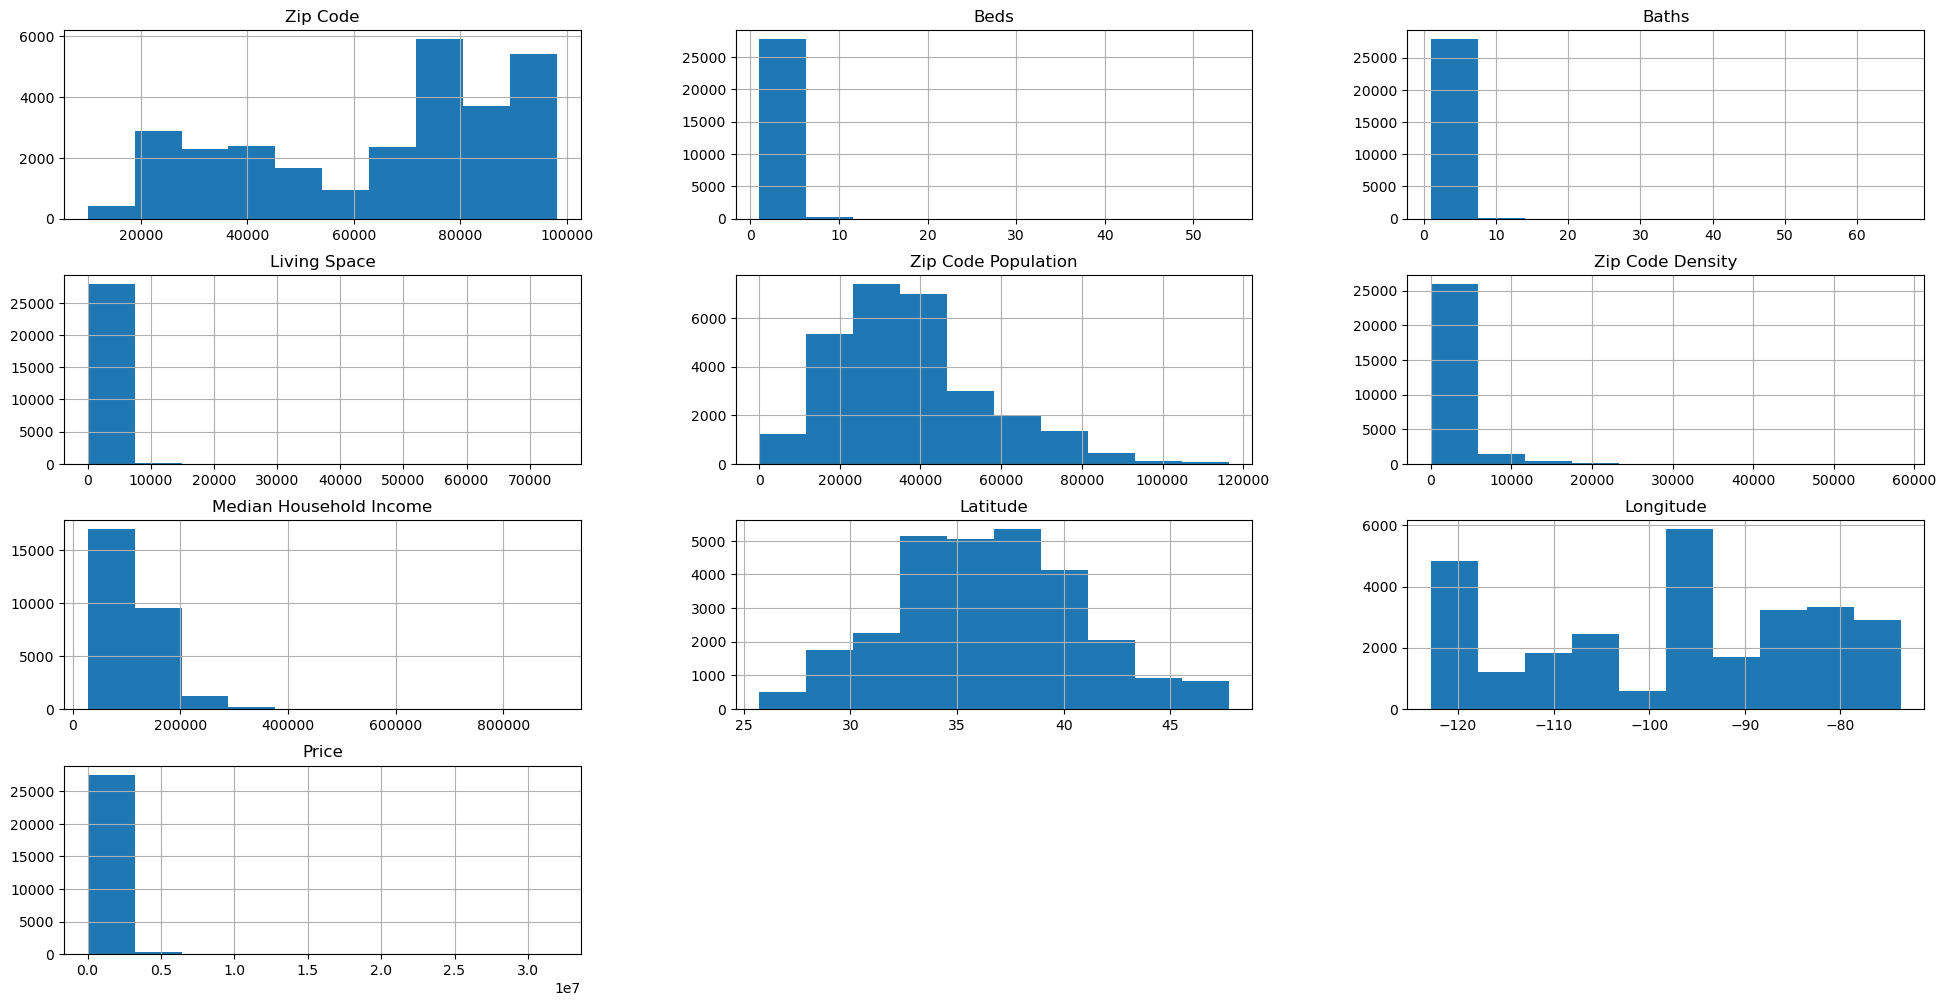

In [20]:
train_data.hist(figsize = (24, 12))

In [21]:
train_data = train_data.drop(['State'], axis=1)

In [22]:
train_data = train_data.drop(['City'], axis=1)

In [23]:
train_data = train_data.drop(['Address'], axis=1)

In [24]:
train_data = train_data.drop(['County'], axis=1)

In [25]:
train_data.corr()

,Zip Code,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude,Price
Zip Code,1.000000,0.016096,0.005797,0.034197,-0.026523,-0.101528,0.150218,-0.050960,-0.940387,0.118077
Beds,0.016096,1.000000,0.695255,0.632998,0.065423,-0.132919,0.008490,-0.052718,0.005723,0.275543
Baths,0.005797,0.695255,1.000000,0.750062,-0.001582,-0.067845,0.220627,-0.103889,-0.000102,0.461255
Living Space,0.034197,0.632998,0.750062,1.000000,-0.044468,-0.101682,0.213630,-0.059948,-0.011589,0.501126
Zip Code Population,-0.026523,0.065423,-0.001582,-0.044468,1.000000,0.109788,-0.128768,-0.080567,-0.017926,-0.046232
Zip Code Density,-0.101528,-0.132919,-0.067845,-0.101682,0.109788,1.000000,0.173127,0.180829,0.017606,0.158016
Median Household Income,0.150218,0.008490,0.220627,0.213630,-0.128768,0.173127,1.000000,0.046785,-0.220123,0.426735
Latitude,-0.050960,-0.052718,-0.103889,-0.059948,-0.080567,0.180829,0.046785,1.000000,-0.044165,-0.061243
Longitude,-0.940387,0.005723,-0.000102,-0.011589,-0.017926,0.017606,-0.220123,-0.044165,1.000000,-0.175439
Price,0.118077,0.275543,0.461255,0.501126,-0.046232,0.158016,0.426735,-0.061243,-0.175439,1.000000


<Axes: >

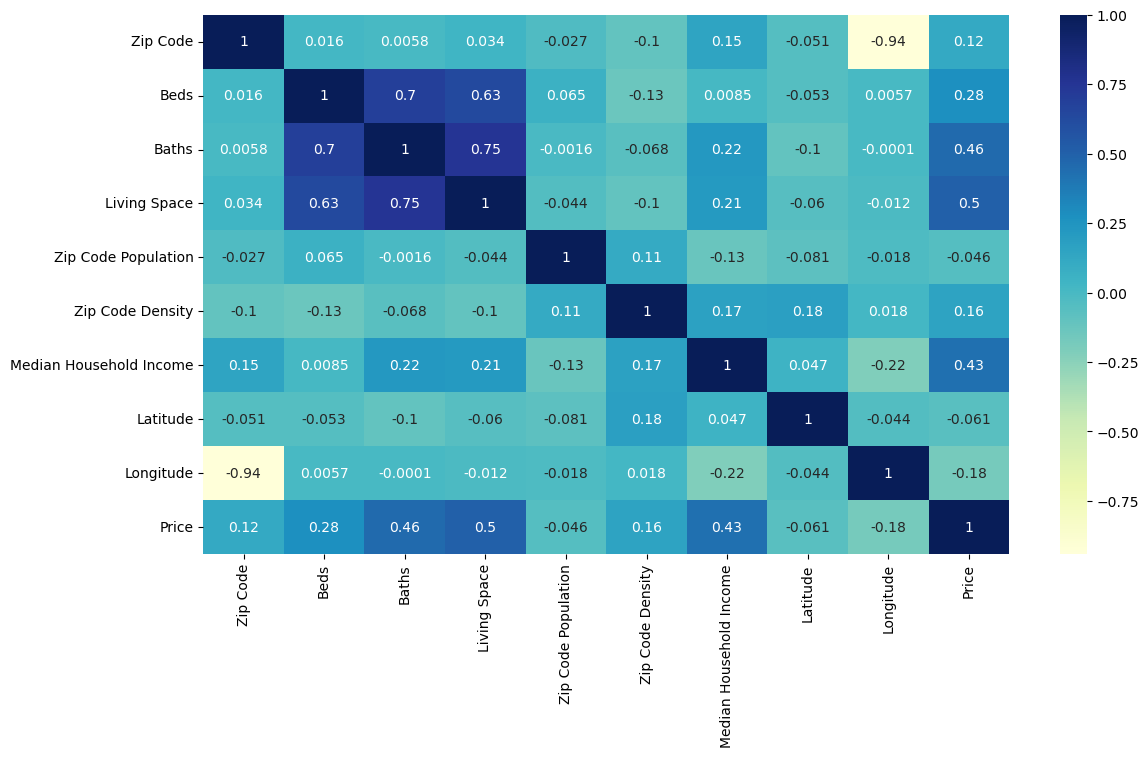

In [26]:
plt.figure(figsize=(13, 7))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [27]:
train_data['Beds'] = np.log(train_data['Beds'] + 1)
train_data['Baths'] = np.log(train_data['Baths'] + 1)
train_data['LivingS pace'] = np.log(train_data['Living Space'] + 1)
train_data['Zip Code Population'] = np.log(train_data['Zip Code Population'] + 1)
train_data['Zip Code Density'] = np.log(train_data['Zip Code Density'] + 1)
train_data['Median_Household_Income'] = np.log(train_data['Median Household Income'] + 1)

array([[<Axes: title={'center': 'Zip Code'}>,
        <Axes: title={'center': 'Beds'}>,
        <Axes: title={'center': 'Baths'}>],
       [<Axes: title={'center': 'Living Space'}>,
        <Axes: title={'center': 'Zip Code Population'}>,
        <Axes: title={'center': 'Zip Code Density'}>],
       [<Axes: title={'center': 'Median Household Income'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'LivingS pace'}>,
        <Axes: title={'center': 'Median_Household_Income'}>]],
      dtype=object)

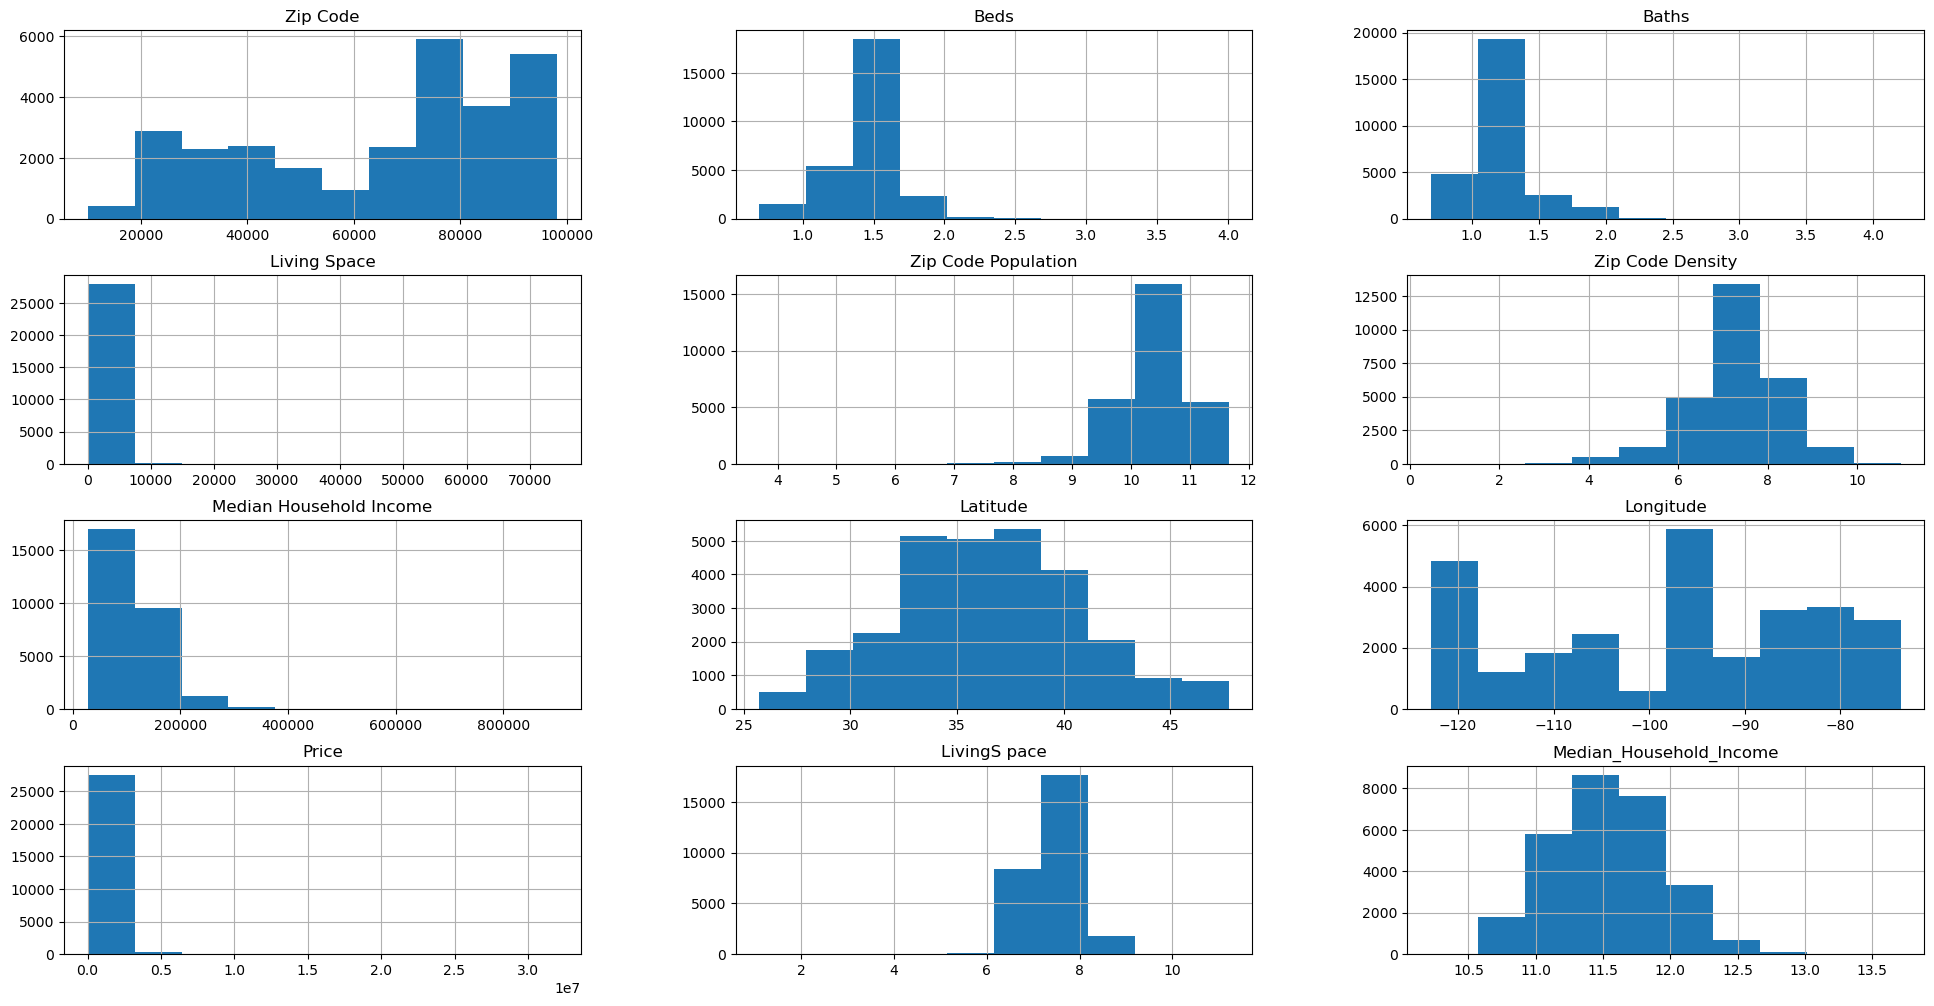

In [28]:
train_data.hist(figsize = (24, 12))

<Axes: xlabel='Beds', ylabel='Price'>

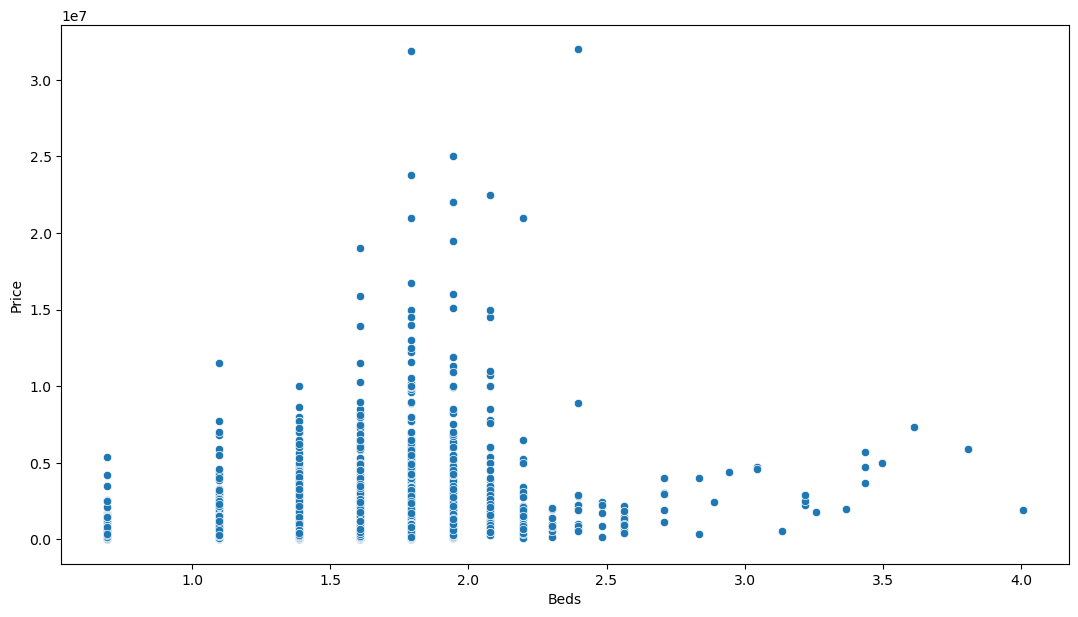

In [29]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = "Beds", y = "Price", data = train_data)

<Axes: xlabel='Baths', ylabel='Price'>

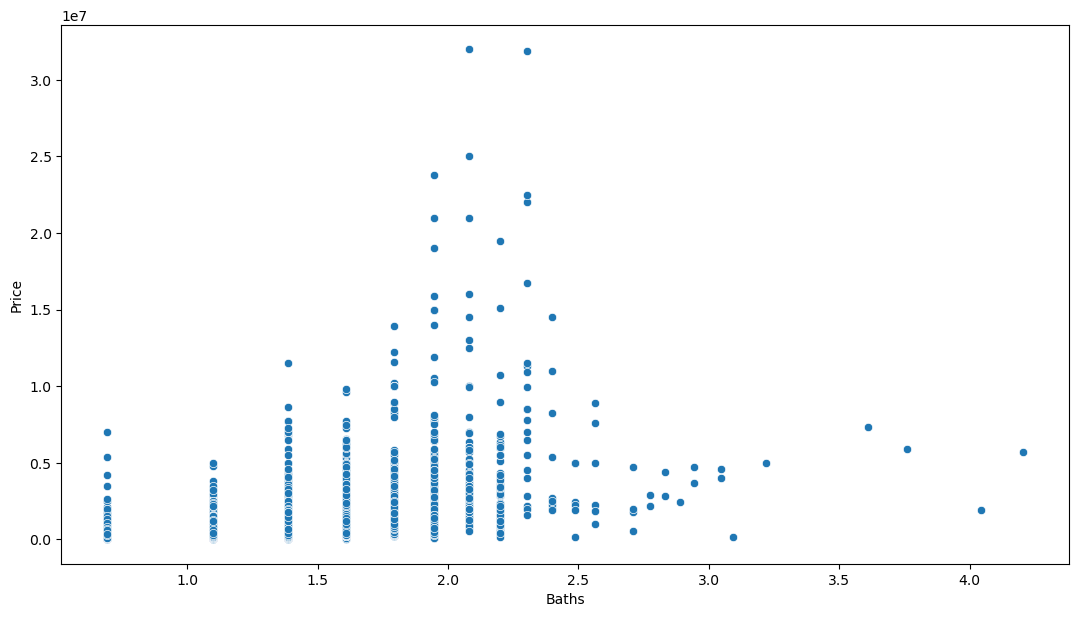

In [30]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = "Baths", y = "Price", data = train_data)

<Axes: xlabel='Zip Code Population', ylabel='Price'>

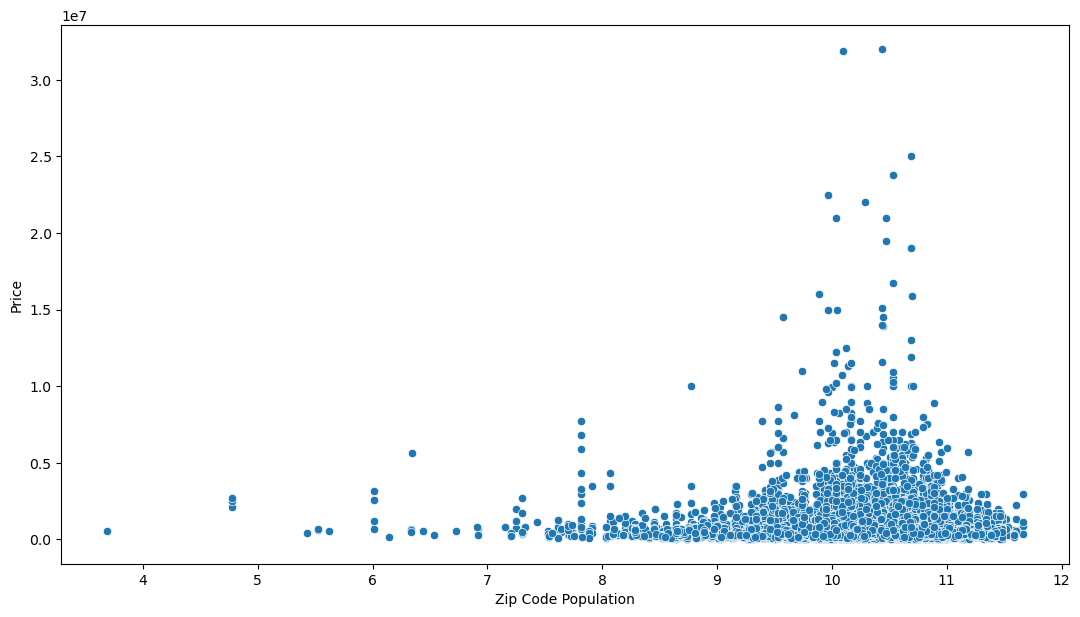

In [31]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = "Zip Code Population", y = "Price", data = train_data)

<Axes: xlabel='Zip Code Density', ylabel='Price'>

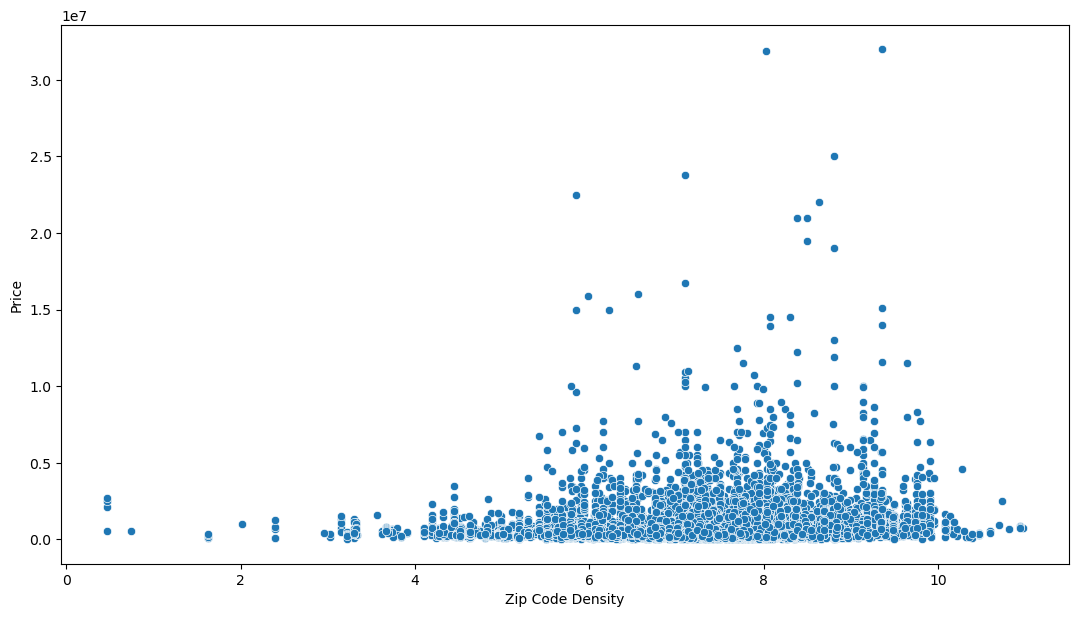

In [32]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = "Zip Code Density", y = "Price", data = train_data)

<Axes: xlabel='Living Space', ylabel='Price'>

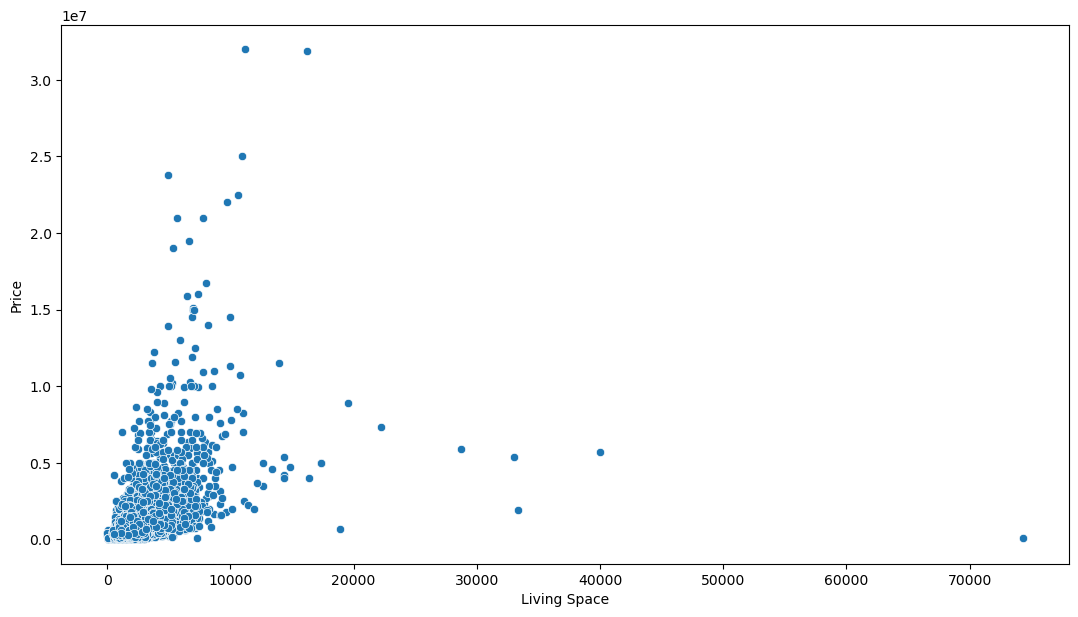

In [33]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = "Living Space", y = "Price", data = train_data)

<Axes: xlabel='Zip Code Density', ylabel='Median Household Income'>

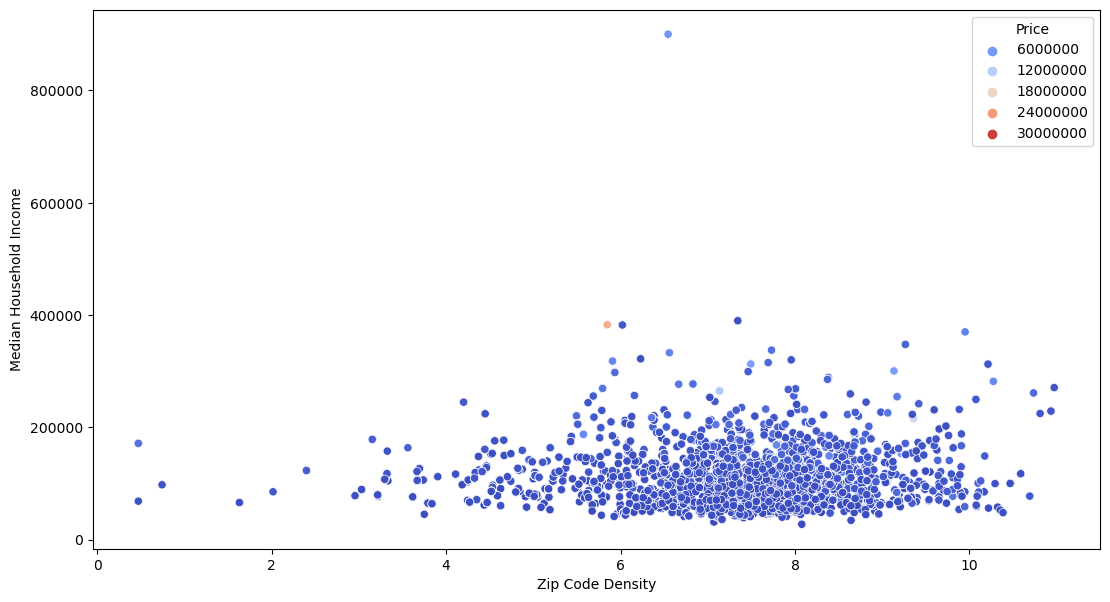

In [34]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = "Zip Code Density", y = "Median Household Income", data = train_data, hue="Price", palette="coolwarm")

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [47]:
test_data

,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,Price,LivingS pace,Median_Household_Income
34187,92127,1.386294,1.609438,2545,8423 RUN OF THE KNLS,San Diego,California,10.836694,6.764924,San Diego,221743.0,33.01913,-117.12339,3495000.0,7.842279,12.309279
35699,94117,1.098612,1.386294,1074,329 WALLER ST APT 2,San Francisco,California,10.614033,9.419847,San Francisco,242062.0,37.77002,-122.44425,1100000.0,6.980076,12.396953
19956,74136,1.609438,1.386294,2714,2933 E 75TH CT,Tulsa,Oklahoma,10.346730,7.349938,Tulsa,81725.0,36.06188,-95.94190,329000.0,7.906547,11.311127
15516,64131,1.386294,0.693147,916,8132 HIGHLAND AVE,Kansas City,Missouri,10.038980,6.943412,Jackson,76640.0,38.95723,-94.57449,147500.0,6.821107,11.246887
34126,92123,1.386294,1.098612,1200,2974 MISSION VILLAGE DR,San Diego,California,10.405353,7.301283,San Diego,127751.0,32.80958,-117.13419,805000.0,7.090910,11.757846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33821,92107,1.609438,1.609438,3356,3945 WILDWOOD RD,San Diego,California,10.300719,8.242625,San Diego,133969.0,32.74020,-117.24357,3395000.0,8.118803,11.805371
10234,40228,1.386294,0.693147,1100,7604 MICHAEL DR,Louisville,Kentucky,9.789927,6.680478,Jefferson,91928.0,38.13931,-85.62947,215000.0,7.003974,11.428772
38322,97202,1.098612,1.098612,928,5292 SE 18TH AVE # 5,Portland,Oregon,10.680700,7.893012,Multnomah,127243.0,45.48232,-122.64365,324900.0,6.834109,11.753862
13488,53218,1.609438,1.098612,1315,4979 N 55TH ST,Milwaukee,Wisconsin,10.675977,7.955600,Milwaukee,55316.0,43.11469,-87.99301,169900.0,7.182352,10.920836


In [80]:
test_data = X_test.join(y_test)

test_data['Beds'] = np.log(test_data['Beds'] + 1)
test_data['Baths'] = np.log(test_data['Baths'] + 1)
test_data['LivingS pace'] = np.log(test_data['Living Space'] + 1)
test_data['Zip Code Population'] = np.log(test_data['Zip Code Population'] + 1)
test_data['Zip Code Density'] = np.log(test_data['Zip Code Density'] + 1)
test_data['Median_Household_Income'] = np.log(test_data['Median Household Income'] + 1)

In [81]:
test_data = test_data.drop(['State'], axis=1)

In [82]:
test_data = test_data.drop(['Address'], axis=1)

In [83]:
test_data = test_data.drop(['City'], axis=1)

In [84]:
test_data = test_data.drop(['County'], axis=1)

In [85]:
test_data

,Zip Code,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude,Price,LivingS pace,Median_Household_Income
34187,92127,1.386294,1.609438,2545,10.836694,6.764924,221743.0,33.01913,-117.12339,3495000.0,7.842279,12.309279
35699,94117,1.098612,1.386294,1074,10.614033,9.419847,242062.0,37.77002,-122.44425,1100000.0,6.980076,12.396953
19956,74136,1.609438,1.386294,2714,10.346730,7.349938,81725.0,36.06188,-95.94190,329000.0,7.906547,11.311127
15516,64131,1.386294,0.693147,916,10.038980,6.943412,76640.0,38.95723,-94.57449,147500.0,6.821107,11.246887
34126,92123,1.386294,1.098612,1200,10.405353,7.301283,127751.0,32.80958,-117.13419,805000.0,7.090910,11.757846
...,...,...,...,...,...,...,...,...,...,...,...,...
33821,92107,1.609438,1.609438,3356,10.300719,8.242625,133969.0,32.74020,-117.24357,3395000.0,8.118803,11.805371
10234,40228,1.386294,0.693147,1100,9.789927,6.680478,91928.0,38.13931,-85.62947,215000.0,7.003974,11.428772
38322,97202,1.098612,1.098612,928,10.680700,7.893012,127243.0,45.48232,-122.64365,324900.0,6.834109,11.753862
13488,53218,1.609438,1.098612,1315,10.675977,7.955600,55316.0,43.11469,-87.99301,169900.0,7.182352,10.920836


In [86]:
x_test, y_test = test_data.drop(['Price'], axis=1), test_data['Price']
x_test_s = scaler.transform(x_test)


In [87]:
reg.score(x_test_s, y_test)

0.43585863938352465

In [93]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [97]:
forest.score(x_test_s, y_test)

0.7078172964238687

In [98]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [102]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.7014408812023578